Best fit-parameters: [5.84993668e+00 9.63922184e-02 1.06047922e-03 1.43748784e-03]
[ 1992.22650381  1846.33108082  1054.5439821    818.67701458
   753.80531594   581.82862491   381.26088407   365.97621132
   319.43089677   300.21834192   290.70180866   282.81946784
   272.18429046    92.4585438     87.3577671     36.43537084
   -10.87676028   -14.62837477   -47.15630226  -112.8438088
  -256.89961988  -289.09915677  -338.83804122  -436.60136324
 -1449.36707947 -2308.58720933]


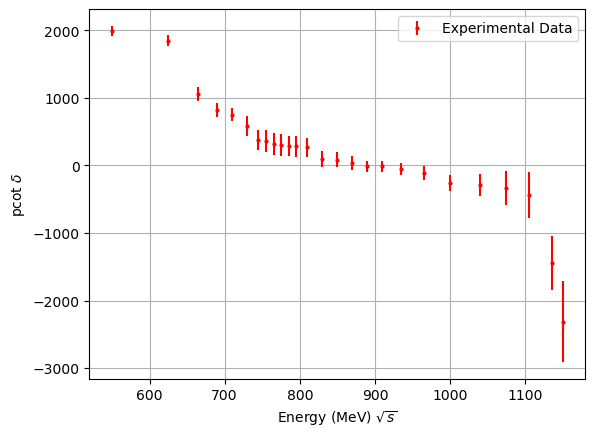

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def con(x):
    x_min = -5e+08
    x_max = -0.5e+08
    y_min = -3000
    y_max = 2000

    y = (x - x_min) * (y_max - y_min) / (x_max - x_min) + y_min
    return y


def T_full(s, a, b, c, d):
    T = (np.sqrt(s) / 2*(a + (np.emath.sqrt(1 - (s / 4))) + b * s + c * (s ** 2)))
    return con(np.real(T))



# Experimental data for p*cot(delta) and errors
E =  np.array([550, 625, 665, 690, 710, 730, 745, 755, 765, 775, 785, 795, 810, 830, 850, 870, 890, 910, 935, 965, 1000, 1040, 1075, 1105, 1135, 1150])
sqrt_s_exp=np.sqrt(E)
delta_exp = np.array([10, 19, 30, 39, 48, 60, 70, 77, 85, 92, 99, 105, 114, 124, 131, 136, 142, 145, 150, 153, 156, 158, 160, 162, 163, 164])
error_delta_exp = np.array([0.7, 0.8, 1, 1, 1, 1.5, 1.5, 1.6, 1.6, 1.6, 1.5, 1.5, 1.4, 1.2, 1.1, 1, 0.8, 0.8, 0.9, 1, 1.2, 1.6, 2.5, 3.4, 4, 6])
#o=(np.tan(p_cot_delta_exp))

pc=np.real(np.emath.sqrt(E**2/4 -139**2)*(1/(np.tan(delta_exp))))
pcerr=np.real(np.emath.sqrt(E**2/4 -139**2)*(1/(np.tan(error_delta_exp))))
def chi_square(params):
    a, b, c, d = params
    T_model = T_full(sqrt_s_exp, a, b, c, d)
    T=np.arctan(np.real(np.emath.sqrt(E**2/4 -139**2))/T_model)
    residuals = (T*1e+2 - delta_exp) / error_delta_exp
    return np.sum(residuals ** 2)

from scipy.optimize import minimize

# Initial guess for the parameters
initial_guess = [16, -0.55, 0.01, 0.01]

# Minimize the chi-square function to find the best-fit parameters
result = minimize(chi_square, initial_guess, method='Nelder-Mead')

# Extract the best-fit parameters
best_fit_params = result.x
pc[::-1].sort()
print("Best fit-parameters:",np.abs(best_fit_params/1e+7))
print(pc)
#plt.plot(E, pc, label='Experimental data', color='red')
plt.errorbar(E, pc, yerr=error_delta_exp*1e+2, fmt='o',markersize=2, label='Experimental Data',color='red')

plt.xlabel(r'Energy (MeV) $\sqrt{s}$')
plt.ylabel(r'pcot $\delta$')
plt.legend()
plt.grid(True)
plt.show()



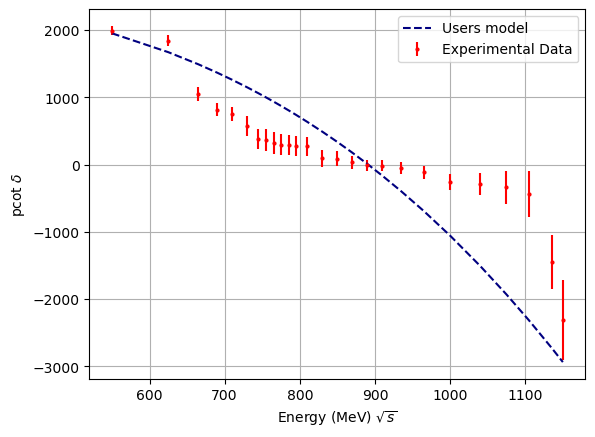

interactive(children=(FloatSlider(value=15.0, description='a:', max=15.0, min=4.0, step=0.001), FloatSlider(va…

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from IPython.display import display

pc=np.real(np.emath.sqrt(E**2/4 -139**2)*(1/(np.tan(delta_exp))))
pc[::-1].sort()

# Experimental data (same as before)

# Define the initial guess for the parameters
initial_guess = [18, -0.65, 0.0, 0]

# Create adjustable sliders for parameters a, b, c, and d
a_slider = widgets.FloatSlider(value=initial_guess[0], min=4, max=15, step=0.001, description='a:')
b_slider = widgets.FloatSlider(value=initial_guess[1], min=0.01, max=0.1, step=0.001, description='b:')
c_slider = widgets.FloatSlider(value=initial_guess[2], min=0.0001, max=0.1, step=0.001, description='c:')
d_slider = widgets.FloatSlider(value=initial_guess[3], min=0.01, max=50, step=0.001, description='d:')

# Function to update the plot with the adjustable parameters
def update_plot(a, b, c, d):
    # Generate the best-fit model using the adjustable parameters for magnitude
    p_fit = T_full(E**2, a, b, c, d)

    # Clear the previous plot
    plt.clf()

    # Plot sqrt(s) vs. Experimental p*cot(delta) with the best-fit model for magnitude
    #plt.scatter(E, pc, label='Experimental Data')
    plt.errorbar(E, pc, yerr=error_delta_exp*1e+2, fmt='o',markersize=2, label='Experimental Data',color='red')

    plt.plot(E, p_fit,'--', label='Users model' ,color='navy')
    #plt.xlim(400,1300)
    #plt.ylim(-3000,3000)
    plt.xlabel(r'Energy (MeV) $\sqrt{s}$')
    plt.ylabel(r'pcot $\delta$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a container for the sliders and display the plot
sliders_container = widgets.HBox([a_slider, b_slider, c_slider, d_slider])
display(sliders_container)
update_plot(initial_guess[0], initial_guess[1], initial_guess[2], initial_guess[3])

# Update the plot when sliders are adjusted
widgets.interactive(update_plot, a=a_slider, b=b_slider, c=c_slider, d=d_slider)


In [57]:
def con(x):
    x_min = -0.5e+08
    x_max = 3.5e+08
    y_min = -3000
    y_max = 2000

    y = (x - x_min) * (y_max - y_min) / (x_max - x_min) + y_min
    return y

print(con(2))

-2374.9999749999997
